## Import Dependecy

In [1]:
# import lib

# analisis dan manipulasi
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
import difflib

# sistem
import os
import glob

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [35]:
# Load Data disini
folder_path = r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\dataset\kaggle\Club Football Match Data (2000 - 2025) ⚽\\'

df = pd.read_csv(folder_path + "Matches.csv")
elo = pd.read_csv(folder_path + "EloRatings.csv")

# Path ke folder CSV
folder_path2 = r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\dataset\core'
fr = pd.read_csv(folder_path2 + "\\FinalRank.csv")

C:\Users\ragil\AppData\Local\Temp\ipykernel_9304\1221153393.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(folder_path + "Matches.csv")


## EDA

In [36]:
print(df.info())
print(elo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228377 entries, 0 to 228376
Data columns (total 42 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Division     228377 non-null  object 
 1   MatchDate    228377 non-null  object 
 2   MatchTime    96892 non-null   object 
 3   HomeTeam     228377 non-null  object 
 4   AwayTeam     228377 non-null  object 
 5   HomeElo      139910 non-null  float64
 6   AwayElo      139842 non-null  float64
 7   Form3Home    226877 non-null  float64
 8   Form5Home    226877 non-null  float64
 9   Form3Away    226877 non-null  float64
 10  Form5Away    226877 non-null  float64
 11  FTHome       228374 non-null  float64
 12  FTAway       228374 non-null  float64
 13  FTResult     228374 non-null  object 
 14  HTHome       173797 non-null  float64
 15  HTAway       173797 non-null  float64
 16  HTResult     173797 non-null  object 
 17  HomeShots    112555 non-null  float64
 18  AwayShots    112558 non-

In [37]:
print(df.describe())

             HomeElo        AwayElo      Form3Home      Form5Home  \
count  139910.000000  139842.000000  226877.000000  226877.000000   
mean     1532.963352    1533.012573       3.984670       6.721461   
std       153.172398     153.221114       2.377063       3.256892   
min      1103.130000    1103.130000       0.000000       0.000000   
25%      1424.770000    1424.830000       2.000000       4.000000   
50%      1515.445000    1515.440000       4.000000       7.000000   
75%      1633.977500    1633.967500       6.000000       9.000000   
max      2107.480000    2107.480000       9.000000      15.000000   

           Form3Away      Form5Away         FTHome         FTAway  \
count  226877.000000  226877.000000  228374.000000  228374.000000   
mean        4.202925       6.927608       1.488458       1.149890   
std         2.392875       3.269290       1.259044       1.112718   
min         0.000000       0.000000       0.000000       0.000000   
25%         3.000000       4.0000

In [38]:
# Cek jumlah nilai yang hilang
print("\nCek null pada df_selected :\n", df.isnull().sum())


Cek null pada df_selected :
 Division            0
MatchDate           0
MatchTime      131485
HomeTeam            0
AwayTeam            0
HomeElo         88467
AwayElo         88535
Form3Home        1500
Form5Home        1500
Form3Away        1500
Form5Away        1500
FTHome              3
FTAway              3
FTResult            3
HTHome          54580
HTAway          54580
HTResult        54580
HomeShots      115822
AwayShots      115819
HomeTarget     116628
AwayTarget     116625
HomeFouls      116584
AwayFouls      116584
HomeCorners    116194
AwayCorners    116194
HomeYellow     111259
AwayYellow     111258
HomeRed        111258
AwayRed        111260
OddHome          3030
OddDraw          3030
OddAway          3030
MaxHome         27635
MaxDraw         27635
MaxAway         27635
Over25          82159
Under25         82160
MaxOver25       82159
MaxUnder25      82160
HandiSize       73824
HandiHome       74077
HandiAway       74101
dtype: int64


In [39]:
print(df.shape)
print(elo.shape)
print(fr.shape)

(228377, 42)
(242591, 4)
(501, 3)


## Pre Processing

In [40]:
# Ambil data EPL
df = df[(df['Division'] == 'E0' )]

df.shape

(9300, 42)

In [41]:
# Ambil fitur statistik
# Daftar kolom yang ingin diambil
selected_columns = [
    'MatchDate', 'HomeTeam', 'AwayTeam', 
    'HomeElo', 'AwayElo', 'Form3Home', 
    'Form5Home', 'Form3Away', 'Form5Away',
    'HomeYellow', 'AwayYellow', 'HomeRed', 
    'AwayRed' ,  'FTHome', 'FTAway', 'FTResult', 
    'HTHome', 'HTAway', 'HTResult', 'HomeShots', 
    'AwayShots', 'HomeTarget', 'AwayTarget', 
    'HomeFouls', 'AwayFouls'
]

# Ambil subset DataFrame
df = df[selected_columns]

print(df.columns)

Index(['MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'Form3Home',
       'Form5Home', 'Form3Away', 'Form5Away', 'HomeYellow', 'AwayYellow',
       'HomeRed', 'AwayRed', 'FTHome', 'FTAway', 'FTResult', 'HTHome',
       'HTAway', 'HTResult', 'HomeShots', 'AwayShots', 'HomeTarget',
       'AwayTarget', 'HomeFouls', 'AwayFouls'],
      dtype='object')


In [42]:
# Cek jumlah nilai yang hilang
print("\nCek null pada df_selected :\n", df.isnull().sum())


Cek null pada df_selected :
 MatchDate     0
HomeTeam      0
AwayTeam      0
HomeElo       1
AwayElo       1
Form3Home     0
Form5Home     0
Form3Away     0
Form5Away     0
HomeYellow    0
AwayYellow    0
HomeRed       0
AwayRed       0
FTHome        0
FTAway        0
FTResult      0
HTHome        0
HTAway        0
HTResult      0
HomeShots     0
AwayShots     0
HomeTarget    0
AwayTarget    0
HomeFouls     0
AwayFouls     0
dtype: int64


In [43]:
print("Mencari letak data null: \n", df[df.isnull().any(axis=1)])
print("Cek keseluruhan nama tim: \n", df['AwayTeam'].unique())
print("Nama klub yang pernah bertanding di EPL: ", len(df[(df['AwayTeam'] == "Nott'm Forest")]))

# Null ada di klub Nottm
elo = elo[(elo['club'] == "Nott'm Forest")]

# Rata-rata buat handling null
mean_elo = elo['elo'].mean()
print("\nRata-rata dari elo rating Nott'm Forest: ", mean_elo)

df[['AwayElo', 'HomeElo']] = df[['AwayElo', 'HomeElo']].fillna(mean_elo)

# Cek ulang
print(df.isnull().sum())

Mencari letak data null: 
          MatchDate       HomeTeam       AwayTeam  HomeElo  AwayElo  Form3Home  \
226793  2024-12-26  Nott'm Forest      Tottenham      NaN  1812.92        0.0   
226880  2024-12-29        Everton  Nott'm Forest  1711.92      NaN        3.0   

        Form5Home  Form3Away  Form5Away  HomeYellow  ...  FTResult  HTHome  \
226793        0.0        3.0        4.0         3.0  ...         H     1.0   
226880        6.0        9.0       15.0         4.0  ...         A     0.0   

        HTAway  HTResult  HomeShots AwayShots  HomeTarget  AwayTarget  \
226793     0.0         H       10.0      13.0         3.0         4.0   
226880     1.0         A       13.0      11.0         2.0         7.0   

       HomeFouls  AwayFouls  
226793      12.0       13.0  
226880      13.0       10.0  

[2 rows x 25 columns]
Cek keseluruhan nama tim: 
 ['Man City' 'West Ham' 'Middlesbrough' 'Southampton' 'Everton'
 'Aston Villa' 'Bradford' 'Arsenal' 'Ipswich' 'Newcastle' 'Liverpool'


In [45]:
# Bikin Season
# Pastikan MatchDate dalam format datetime
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

# Fungsi untuk menentukan musim
def get_season(date):
    year = date.year
    if date.month >= 8:  # Agustus - Desember
        return f"{year}/{year + 1}"
    else:  # Januari - Juli
        return f"{year - 1}/{year}"

# Buat kolom Season
df['Season'] = df['MatchDate'].apply(get_season)


In [46]:
season_counts = df.groupby('Season').size().reset_index(name='JumlahRow')
print(season_counts)

       Season  JumlahRow
0   2000/2001        380
1   2001/2002        380
2   2002/2003        380
3   2003/2004        335
4   2004/2005        335
5   2005/2006        380
6   2006/2007        380
7   2007/2008        380
8   2008/2009        380
9   2009/2010        380
10  2010/2011        380
11  2011/2012        380
12  2012/2013        380
13  2013/2014        380
14  2014/2015        380
15  2015/2016        380
16  2016/2017        380
17  2017/2018        380
18  2018/2019        380
19  2019/2020        380
20  2020/2021        380
21  2021/2022        380
22  2022/2023        380
23  2023/2024        380
24  2024/2025        270


In [47]:
# Drop karena hilang/tidak full seasonnya
# df = df[~df['Season'].isin(['2003/2004', '2004/2005'])]

In [49]:
# Cari DF di 2024/2025
df24 = df[(df['Season'] == '2024/2025')]
df24

,MatchDate,HomeTeam,AwayTeam,HomeElo,AwayElo,Form3Home,Form5Home,Form3Away,Form5Away,HomeYellow,...,HTHome,HTAway,HTResult,HomeShots,AwayShots,HomeTarget,AwayTarget,HomeFouls,AwayFouls,Season
222490,2024-08-16,Man United,Fulham,1779.04,1716.28,6.0,7.0,4.0,5.0,2.0,...,0.0,0.0,D,14.0,10.0,5.0,2.0,12.0,10.0,2024/2025
222509,2024-08-17,Ipswich,Liverpool,1568.33,1900.69,7.0,9.0,7.0,8.0,3.0,...,0.0,0.0,D,7.0,18.0,2.0,5.0,9.0,18.0,2024/2025
222536,2024-08-17,Arsenal,Wolves,1946.90,1677.86,9.0,15.0,0.0,3.0,2.0,...,1.0,0.0,H,18.0,9.0,6.0,3.0,17.0,14.0,2024/2025
222537,2024-08-17,Everton,Brighton,1706.85,1713.16,4.0,10.0,1.0,4.0,1.0,...,0.0,1.0,A,9.0,10.0,1.0,5.0,8.0,8.0,2024/2025
222538,2024-08-17,Newcastle,Southampton,1801.80,1599.60,4.0,10.0,3.0,6.0,2.0,...,1.0,0.0,H,3.0,19.0,1.0,4.0,15.0,16.0,2024/2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228372,2025-02-26,Brentford,Everton,1738.05,1731.52,6.0,9.0,5.0,11.0,2.0,...,1.0,0.0,H,12.0,14.0,3.0,4.0,3.0,6.0,2024/2025
228373,2025-02-26,Man United,Ipswich,1757.62,1584.51,1.0,4.0,1.0,1.0,4.0,...,2.0,2.0,D,10.0,12.0,6.0,3.0,9.0,16.0,2024/2025
228374,2025-02-26,Nott'm Forest,Arsenal,1788.28,1999.49,3.0,6.0,6.0,10.0,1.0,...,0.0,0.0,D,6.0,13.0,2.0,1.0,10.0,17.0,2024/2025
228375,2025-02-26,Tottenham,Man City,1785.53,1926.48,9.0,9.0,3.0,9.0,3.0,...,0.0,1.0,A,11.0,12.0,6.0,5.0,12.0,15.0,2024/2025


In [51]:
# Cari DF di 2024/2025
# df24 = df[(df['Season'] == '2024/2025')]

unique_home_teams = df['HomeTeam'].unique()

print(f"Jumlah tim unik: {len(unique_home_teams)}")
print(unique_home_teams)

# Nottm forest double
# Handling

df = df.replace("Nott'm Forest", "Nottm Forest")

Jumlah tim unik: 47
['Charlton' 'Chelsea' 'Coventry' 'Derby' 'Leeds' 'Leicester' 'Liverpool'
 'Sunderland' 'Tottenham' 'Man United' 'Arsenal' 'Bradford' 'Ipswich'
 'Middlesbrough' 'Everton' 'Man City' 'Newcastle' 'Southampton' 'West Ham'
 'Aston Villa' 'Bolton' 'Blackburn' 'Fulham' 'Birmingham' 'West Brom'
 'Portsmouth' 'Wolves' 'Norwich' 'Crystal Palace' 'Wigan' 'Reading'
 'Sheffield United' 'Watford' 'Hull' 'Stoke' 'Burnley' 'Blackpool' 'QPR'
 'Swansea' 'Cardiff' 'Bournemouth' 'Brighton' 'Huddersfield' 'Brentford'
 'Nottm Forest' 'Luton' "Nott'm Forest"]


In [52]:
unique_home_teams = fr['team'].unique()

print(f"Jumlah tim unik: {len(unique_home_teams)}")
print(unique_home_teams)

fr = fr.dropna()

Jumlah tim unik: 47
['Manchester United' 'Arsenal' 'Liverpool' 'Leeds United' 'Ipswich Town'
 'Chelsea' 'Sunderland' 'Aston Villa' 'Charlton Athletic' 'Southampton'
 'Newcastle United' 'Tottenham Hotspur' 'Leicester City' 'Middlesbrough'
 'West Ham United' 'Everton' 'Derby County' 'Manchester City'
 'Coventry City' 'Bradford City' 'Blackburn Rovers' 'Fulham'
 'Bolton Wanderers' 'Birmingham City' 'West Bromwich Albion' 'Portsmouth'
 'Wolverhampton Wanderers' 'Crystal Palace' 'Norwich City'
 'Wigan Athletic' 'Reading' 'Sheffield United' 'Watford' 'Stoke City'
 'Hull City' 'Burnley' 'Blackpool' 'Swansea City' 'Queens Park Rangers'
 'Cardiff City' 'Bournemouth' 'Brighton And Hove Albion'
 'Huddersfield Town' 'Brentford' 'Nottingham Forest' 'Luton Town' '```']


In [53]:
team_mapping = {
    'Manchester United': 'Man United',
    'Arsenal': 'Arsenal',
    'Liverpool': 'Liverpool',
    'Leeds United': 'Leeds',
    'Ipswich Town': 'Ipswich',
    'Chelsea': 'Chelsea',
    'Sunderland': 'Sunderland',
    'Aston Villa': 'Aston Villa',
    'Charlton Athletic': 'Charlton',
    'Southampton': 'Southampton',
    'Newcastle United': 'Newcastle',
    'Tottenham Hotspur': 'Tottenham',
    'Leicester City': 'Leicester',
    'Middlesbrough': 'Middlesbrough',
    'West Ham United': 'West Ham',
    'Everton': 'Everton',
    'Derby County': 'Derby',
    'Manchester City': 'Man City',
    'Coventry City': 'Coventry',
    'Bradford City': 'Bradford',
    'Blackburn Rovers': 'Blackburn',
    'Fulham': 'Fulham',
    'Bolton Wanderers': 'Bolton',
    'Birmingham City': 'Birmingham',
    'West Bromwich Albion': 'West Brom',
    'Portsmouth': 'Portsmouth',
    'Wolverhampton Wanderers': 'Wolves',
    'Crystal Palace': 'Crystal Palace',
    'Norwich City': 'Norwich',
    'Wigan Athletic': 'Wigan',
    'Reading': 'Reading',
    'Sheffield United': 'Sheffield United',
    'Watford': 'Watford',
    'Stoke City': 'Stoke',
    'Hull City': 'Hull',
    'Burnley': 'Burnley',
    'Blackpool': 'Blackpool',
    'Swansea City': 'Swansea',
    'Queens Park Rangers': 'QPR',
    'Cardiff City': 'Cardiff',
    'Bournemouth': 'Bournemouth',
    'Brighton And Hove Albion': 'Brighton',
    'Huddersfield Town': 'Huddersfield',
    'Brentford': 'Brentford',
    'Nottingham Forest': 'Nottm Forest',
    'Luton Town': 'Luton'
}

# Ubah nama tim
fr['team'] = fr['team'].replace(team_mapping)

C:\Users\ragil\AppData\Local\Temp\ipykernel_9304\4184457844.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fr['team'] = fr['team'].replace(team_mapping)


In [54]:
unique_home_teams = fr['team'].unique()

print(f"Jumlah tim unik: {len(unique_home_teams)}")
print(unique_home_teams)

Jumlah tim unik: 46
['Man United' 'Arsenal' 'Liverpool' 'Leeds' 'Ipswich' 'Chelsea'
 'Sunderland' 'Aston Villa' 'Charlton' 'Southampton' 'Newcastle'
 'Tottenham' 'Leicester' 'Middlesbrough' 'West Ham' 'Everton' 'Derby'
 'Man City' 'Coventry' 'Bradford' 'Blackburn' 'Fulham' 'Bolton'
 'Birmingham' 'West Brom' 'Portsmouth' 'Wolves' 'Crystal Palace' 'Norwich'
 'Wigan' 'Reading' 'Sheffield United' 'Watford' 'Stoke' 'Hull' 'Burnley'
 'Blackpool' 'Swansea' 'QPR' 'Cardiff' 'Bournemouth' 'Brighton'
 'Huddersfield' 'Brentford' 'Nottm Forest' 'Luton']


In [55]:
# Akumulasi kartu untuk HomeTeam
home_cards = df[['Season', 'HomeTeam', 'HomeYellow', 'HomeRed']].copy()
home_cards = home_cards.rename(columns={
    'HomeTeam': 'Team',
    'HomeYellow': 'Yellow',
    'HomeRed': 'Red'
})

# Akumulasi kartu untuk AwayTeam
away_cards = df[['Season', 'AwayTeam', 'AwayYellow', 'AwayRed']].copy()
away_cards = away_cards.rename(columns={
    'AwayTeam': 'Team',
    'AwayYellow': 'Yellow',
    'AwayRed': 'Red'
})

# Gabungkan Home dan Away
all_cards = pd.concat([home_cards, away_cards], ignore_index=True)

# Group by Team dan Season → jumlah Yellow dan Red
card_summary = all_cards.groupby(['Season', 'Team']).agg(
    TotalYellow=('Yellow', 'sum'),
    TotalRed=('Red', 'sum')
).reset_index()

# Tambahkan kolom TotalCards (opsional)
card_summary['TotalCards'] = card_summary['TotalYellow'] + card_summary['TotalRed']

# Lihat hasil
print(card_summary)

        Season          Team  TotalYellow  TotalRed  TotalCards
0    2000/2001       Arsenal         48.0       3.0        51.0
1    2000/2001   Aston Villa         66.0       3.0        69.0
2    2000/2001      Bradford         57.0       1.0        58.0
3    2000/2001      Charlton         44.0       3.0        47.0
4    2000/2001       Chelsea         75.0       2.0        77.0
..         ...           ...          ...       ...         ...
495  2024/2025  Nottm Forest         55.0       2.0        57.0
496  2024/2025   Southampton         74.0       3.0        77.0
497  2024/2025     Tottenham         49.0       1.0        50.0
498  2024/2025      West Ham         57.0       3.0        60.0
499  2024/2025        Wolves         56.0       2.0        58.0

[500 rows x 5 columns]


In [56]:
# Pastikan data sudah urut berdasarkan tanggal
df = df.sort_values(['Season', 'MatchDate']).reset_index(drop=True)

# Buat fitur kumulatif untuk HomeTeam
df['HomeYellowCumu'] = (
    df.groupby(['Season', 'HomeTeam'])['HomeYellow'].cumsum()
)
df['HomeRedCumu'] = (
    df.groupby(['Season', 'HomeTeam'])['HomeRed'].cumsum()
)

# Buat fitur kumulatif untuk AwayTeam
df['AwayYellowCumu'] = (
    df.groupby(['Season', 'AwayTeam'])['AwayYellow'].cumsum()
)
df['AwayRedCumu'] = (
    df.groupby(['Season', 'AwayTeam'])['AwayRed'].cumsum()
)

# Cek hasil
print(df[['MatchDate', 'HomeTeam', 'AwayTeam', 'HomeYellow', 'HomeYellowCumu', 'HomeRed', 'HomeRedCumu', 'AwayYellow', 'AwayYellowCumu', 'AwayRed', 'AwayRedCumu']].head(10))


   MatchDate    HomeTeam       AwayTeam  HomeYellow  HomeYellowCumu  HomeRed  \
0 2000-08-19    Charlton       Man City         1.0             1.0      0.0   
1 2000-08-19     Chelsea       West Ham         1.0             1.0      0.0   
2 2000-08-19    Coventry  Middlesbrough         5.0             5.0      1.0   
3 2000-08-19       Derby    Southampton         1.0             1.0      0.0   
4 2000-08-19       Leeds        Everton         1.0             1.0      0.0   
5 2000-08-19   Leicester    Aston Villa         2.0             2.0      0.0   
6 2000-08-19   Liverpool       Bradford         1.0             1.0      0.0   
7 2000-08-19  Sunderland        Arsenal         3.0             3.0      0.0   
8 2000-08-19   Tottenham        Ipswich         0.0             0.0      0.0   
9 2000-08-20  Man United      Newcastle         0.0             0.0      0.0   

   HomeRedCumu  AwayYellow  AwayYellowCumu  AwayRed  AwayRedCumu  
0          0.0         2.0             2.0      0.0 

In [57]:
# Pastikan MatchDate bentuk datetime
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

# 1. DaysSinceLastMatchHome & DaysSinceLastMatchAway
# Kita buat dua kolom baru
last_match_home = {}
last_match_away = {}

days_since_home = []
days_since_away = []

for idx, row in df.sort_values('MatchDate').iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']
    
    # Hitung selisih hari untuk HomeTeam
    if home_team in last_match_home:
        days_since = (match_date - last_match_home[home_team]).days
        days_since_home.append(days_since)
    else:
        days_since_home.append(np.nan)  # Kalau belum pernah main sebelumnya
        
    # Hitung selisih hari untuk AwayTeam
    if away_team in last_match_away:
        days_since = (match_date - last_match_away[away_team]).days
        days_since_away.append(days_since)
    else:
        days_since_away.append(np.nan)
    
    # Update tanggal main terakhir
    last_match_home[home_team] = match_date
    last_match_away[away_team] = match_date

df['DaysSinceLastMatchHome'] = days_since_home
df['DaysSinceLastMatchAway'] = days_since_away

# 2. IsWeekend (Sabtu/Minggu = 1, selain itu 0)
df['IsWeekend'] = df['MatchDate'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

# 3. SeasonProgress
# Kita butuh tau tanggal start dan end per season
season_start_dates = df.groupby('Season')['MatchDate'].min()
season_end_dates = df.groupby('Season')['MatchDate'].max()

season_progress = []
for idx, row in df.iterrows():
    start = season_start_dates[row['Season']]
    end = season_end_dates[row['Season']]
    progress = (row['MatchDate'] - start).days / (end - start).days
    season_progress.append(progress)

df['SeasonProgress'] = season_progress

# 4. AvgEloLast5Home & AvgEloLast5Away
home_elo_history = {}
away_elo_history = {}

avg_home_elo_last5 = []
avg_away_elo_last5 = []

for idx, row in df.sort_values('MatchDate').iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_elo_now = row['HomeElo']
    away_elo_now = row['AwayElo']
    
    # Home
    if home_team in home_elo_history and len(home_elo_history[home_team]) >= 1:
        avg_home = np.mean(home_elo_history[home_team][-5:])
        avg_home_elo_last5.append(avg_home)
    else:
        avg_home_elo_last5.append(home_elo_now)  # Kalau belum ada cukup history, pakai HomeElo saat ini
        
    # Away
    if away_team in away_elo_history and len(away_elo_history[away_team]) >= 1:
        avg_away = np.mean(away_elo_history[away_team][-5:])
        avg_away_elo_last5.append(avg_away)
    else:
        avg_away_elo_last5.append(away_elo_now)  # Sama, kalau history belum ada
        
    # Update history setelah dipakai
    home_elo_history.setdefault(home_team, []).append(home_elo_now)
    away_elo_history.setdefault(away_team, []).append(away_elo_now)

df['AvgEloLast5Home'] = avg_home_elo_last5
df['AvgEloLast5Away'] = avg_away_elo_last5


# 5. FormStreakHome dan FormStreakAway (3 kemenangan beruntun = 1, else 0)
home_form_history = {}
away_form_history = {}

form_streak_home = []
form_streak_away = []

for idx, row in df.sort_values('MatchDate').iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    result = row['FTResult']  # H, D, A

    # Home
    if home_team in home_form_history and len(home_form_history[home_team]) >= 3:
        streak = home_form_history[home_team][-3:]
        if all(r == 'H' for r in streak):
            form_streak_home.append(1)
        else:
            form_streak_home.append(0)
    else:
        form_streak_home.append(0)
        
    # Away
    if away_team in away_form_history and len(away_form_history[away_team]) >= 3:
        streak = away_form_history[away_team][-3:]
        if all(r == 'A' for r in streak):
            form_streak_away.append(1)
        else:
            form_streak_away.append(0)
    else:
        form_streak_away.append(0)

    # Update history
    home_form_history.setdefault(home_team, []).append(result)
    away_form_history.setdefault(away_team, []).append(result)

df['FormStreakHome'] = form_streak_home
df['FormStreakAway'] = form_streak_away

# 6. DaysSinceFirstMatchHome dan DaysSinceFirstMatchAway
first_match_home = {}
first_match_away = {}

days_since_first_home = []
days_since_first_away = []

for idx, row in df.sort_values('MatchDate').iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    match_date = row['MatchDate']
    
    # Home
    if home_team in first_match_home:
        days_since_first = (match_date - first_match_home[home_team]).days
        days_since_first_home.append(days_since_first)
    else:
        first_match_home[home_team] = match_date
        days_since_first_home.append(0)  # 0 hari kalau match pertama
        
    # Away
    if away_team in first_match_away:
        days_since_first = (match_date - first_match_away[away_team]).days
        days_since_first_away.append(days_since_first)
    else:
        first_match_away[away_team] = match_date
        days_since_first_away.append(0)

df['DaysSinceFirstMatchHome'] = days_since_first_home
df['DaysSinceFirstMatchAway'] = days_since_first_away


In [58]:
# 1. Season 2000/2001: NaN DaysSinceLastMatch -> isi 0
mask_2000_home = (df['Season'] == '2000/2001') & (df['DaysSinceLastMatchHome'].isna())
df.loc[mask_2000_home, 'DaysSinceLastMatchHome'] = 0

mask_2000_away = (df['Season'] == '2000/2001') & (df['DaysSinceLastMatchAway'].isna())
df.loc[mask_2000_away, 'DaysSinceLastMatchAway'] = 0

# 2. Untuk Season selain 2000/2001:
mask_not_2000 = (df['Season'] != '2000/2001')

# Home
mask_home_over_140 = (mask_not_2000) & (df['DaysSinceLastMatchHome'] > 140)
mask_home_nan = (mask_not_2000) & (df['DaysSinceLastMatchHome'].isna())
df.loc[mask_home_over_140 | mask_home_nan, 'DaysSinceLastMatchHome'] = 100

# Away
mask_away_over_140 = (mask_not_2000) & (df['DaysSinceLastMatchAway'] > 140)
mask_away_nan = (mask_not_2000) & (df['DaysSinceLastMatchAway'].isna())
df.loc[mask_away_over_140 | mask_away_nan, 'DaysSinceLastMatchAway'] = 100

# 3. Cari tim promoted berdasarkan DaysSince == 100
promoted_home = df[
    (df['DaysSinceLastMatchHome'] == 100) & (df['Season'] != '2000/2001')
]['HomeTeam'].unique()

promoted_away = df[
    (df['DaysSinceLastMatchAway'] == 100) & (df['Season'] != '2000/2001')
]['AwayTeam'].unique()

promoted_teams = set(promoted_home).union(set(promoted_away))

# 4. Buat fitur IsPromotedTeam
df['IsPromotedTeam'] = df.apply(
    lambda row: 1 if (row['HomeTeam'] in promoted_teams) or (row['AwayTeam'] in promoted_teams) else 0,
    axis=1
)


In [61]:
df.columns

Index(['MatchDate', 'HomeTeam', 'AwayTeam', 'HomeElo', 'AwayElo', 'Form3Home',
       'Form5Home', 'Form3Away', 'Form5Away', 'HomeYellow', 'AwayYellow',
       'HomeRed', 'AwayRed', 'FTHome', 'FTAway', 'FTResult', 'HTHome',
       'HTAway', 'HTResult', 'HomeShots', 'AwayShots', 'HomeTarget',
       'AwayTarget', 'HomeFouls', 'AwayFouls', 'Season', 'HomeYellowCumu',
       'HomeRedCumu', 'AwayYellowCumu', 'AwayRedCumu',
       'DaysSinceLastMatchHome', 'DaysSinceLastMatchAway', 'IsWeekend',
       'SeasonProgress', 'AvgEloLast5Home', 'AvgEloLast5Away',
       'FormStreakHome', 'FormStreakAway', 'DaysSinceFirstMatchHome',
       'DaysSinceFirstMatchAway', 'IsPromotedTeam'],
      dtype='object')

## Ubah Format Dataset

In [203]:
# Kolom-kolom yang ingin dikonversi dari Home/Away ke Team/Opponent
team_cols = {
    'Elo': ['HomeElo', 'AwayElo'],
    'Form3': ['Form3Home', 'Form3Away'],
    'Form5': ['Form5Home', 'Form5Away'],
    'Yellow': ['HomeYellow', 'AwayYellow'],
    'Red': ['HomeRed', 'AwayRed'],
    'FullGoal' : ['FTHome', 'FTAway'],
    'HalfGoal' : ['HTHome', 'HTAway'],
    'Shots': ['HomeShots', 'AwayShots'],
    'Target': ['HomeTarget', 'AwayTarget'],
    'Fouls': ['HomeFouls', 'AwayFouls'],
    'YellowCumu': ['HomeYellowCumu', 'AwayYellowCumu'],
    'RedCumu': ['HomeRedCumu', 'AwayRedCumu'],
    'DaysSinceLast': ['DaysSinceLastMatchHome', 'DaysSinceLastMatchAway'],
    'AvgEloLast5': ['AvgEloLast5Home', 'AvgEloLast5Away'],
    'FormStreak': ['FormStreakHome', 'FormStreakAway'],
    'DaysSinceFirst': ['DaysSinceFirstMatchHome', 'DaysSinceFirstMatchAway']
}

# Buat dataframe versi home
home_df = df[[
    'MatchDate', 'HomeTeam', 'AwayTeam', 'FTResult', 'Season', 'IsWeekend', 'SeasonProgress', 'IsPromotedTeam'
]].copy()

home_df.rename(columns={
    'HomeTeam': 'Team',
    'AwayTeam': 'Opponent',
}, inplace=True)

home_df['IsHome'] = 1

# Tambahkan semua fitur yang diremap
for new_col, (home_col, away_col) in team_cols.items():
    home_df[f'Team{new_col}'] = df[home_col]
    home_df[f'Opponent{new_col}'] = df[away_col]

# Buat dataframe versi away
away_df = df[[
    'MatchDate', 'HomeTeam', 'AwayTeam', 'FTResult', 'Season', 'IsWeekend', 'SeasonProgress', 'IsPromotedTeam'
]].copy()

away_df.rename(columns={
    'AwayTeam': 'Team',
    'HomeTeam': 'Opponent',
}, inplace=True)

away_df['IsHome'] = 0

# Tambahkan semua fitur yang diremap
for new_col, (home_col, away_col) in team_cols.items():
    away_df[f'Team{new_col}'] = df[away_col]
    away_df[f'Opponent{new_col}'] = df[home_col]

# Ubah FTResult untuk perspektif tim tandang
def invert_result(result):
    if result == 'W':
        return 'L'
    elif result == 'L':
        return 'W'
    return result  # D (draw) tetap

away_df['FTResult'] = away_df['FTResult'].apply(invert_result)

def convert_to_wdl(result, is_home):
    if result == 'H':
        return 'W' if is_home else 'L'
    elif result == 'A':
        return 'L' if is_home else 'W'
    else:  # 'D'
        return 'D'
        
home_df['FTResult'] = df['FTResult'].apply(lambda r: convert_to_wdl(r, is_home=True))
away_df['FTResult'] = df['FTResult'].apply(lambda r: convert_to_wdl(r, is_home=False))

# Gabungkan
team_df = pd.concat([home_df, away_df], ignore_index=True)

# Urutkan berdasarkan tanggal
team_df.sort_values(by='MatchDate', inplace=True)

# Reset index
team_df.reset_index(drop=True, inplace=True)

In [204]:
team_df.shape

(18600, 41)

In [205]:
# Pastikan 'Season' di kedua DataFrame berupa string
fr['Season'] = fr['Season'].astype(str)
team_df['Season'] = team_df['Season'].astype(str)

# Siapkan DataFrame untuk peringkat tahun berikutnya
rank_next = fr[['team', 'Season', 'FinalRank']].copy()

# Ganti nama kolom agar sesuai dengan yang ada di team_df
rank_next.rename(columns={'team': 'Team', 'FinalRank': 'FinalRank'}, inplace=True)

# Merge ke team_df
team_df = team_df.merge(rank_next, on=['Team', 'Season'], how='left')


In [206]:
# Pastikan data diurutkan per tim dan tanggal pertandingan
df = team_df.sort_values(by=['Team', 'MatchDate'])

# Fungsi untuk menghitung moving average dengan padding 0 jika match belum cukup
def rolling_avg_with_padding(series, window=3):
    result = []
    buffer = []

    for val in series:
        buffer.append(val)
        if len(buffer) > window:
            buffer.pop(0)
        padded = buffer.copy()
        while len(padded) < window:
            padded.insert(0, 0)
        result.append(np.mean(padded))
    
    return result

# Hitung rata-rata gol 3 pertandingan sebelumnya untuk tim
df['TeamAvgGoalLast3'] = df.groupby('Team')['TeamFullGoal'].transform(lambda x: rolling_avg_with_padding(x, 3))
df['OpponentAvgGoalLast3'] = df.groupby('Opponent')['OpponentFullGoal'].transform(lambda x: rolling_avg_with_padding(x, 3))

# SHOTS
df['TeamAvgShotsLast3'] = df.groupby('Team')['TeamShots'].transform(lambda x: rolling_avg_with_padding(x, 3))
df['OpponentAvgShotsLast3'] = df.groupby('Opponent')['OpponentShots'].transform(lambda x: rolling_avg_with_padding(x, 3))

# TARGET
df['TeamAvgTargetLast3'] = df.groupby('Team')['TeamTarget'].transform(lambda x: rolling_avg_with_padding(x, 3))
df['OpponentAvgTargetLast3'] = df.groupby('Opponent')['OpponentTarget'].transform(lambda x: rolling_avg_with_padding(x, 3))

# FOULS
df['TeamAvgFoulsLast3'] = df.groupby('Team')['TeamFouls'].transform(lambda x: rolling_avg_with_padding(x, 3))
df['OpponentAvgFoulsLast3'] = df.groupby('Opponent')['OpponentFouls'].transform(lambda x: rolling_avg_with_padding(x, 3))

In [227]:
df['GoalsScored'] = df.apply(
    lambda row: row['TeamFullGoal'] if row['IsHome'] else row['OpponentFullGoal'], axis=1
)

df['GoalsConceded'] = df.apply(
    lambda row: row['OpponentFullGoal'] if row['IsHome'] else row['TeamFullGoal'], axis=1
)

In [232]:
# Urutkan dulu berdasarkan Team dan tanggal
df = df.sort_values(by=['Team', 'MatchDate'])

# Rata-rata GoalsConceded 3 match terakhir (tim)
df['AvgConcededLast3_Team'] = (
    df.groupby('Team')['GoalsConceded']
    .transform(lambda x: x.shift(1).fillna(0).rolling(3, min_periods=1).mean())
)

# Sekarang untuk lawannya (opponent)
df = df.sort_values(by=['Opponent', 'MatchDate'])

df['AvgConcededLast3_Opp'] = (
    df.groupby('Opponent')['GoalsConceded']
      .transform(lambda x: x.shift(1).fillna(0).rolling(3, min_periods=1).mean())
)

In [236]:
df.columns

Index(['MatchDate', 'Team', 'Opponent', 'FTResult', 'Season', 'IsWeekend',
       'SeasonProgress', 'IsPromotedTeam', 'IsHome', 'TeamElo', 'OpponentElo',
       'TeamForm3', 'OpponentForm3', 'TeamForm5', 'OpponentForm5',
       'TeamYellow', 'OpponentYellow', 'TeamRed', 'OpponentRed',
       'TeamFullGoal', 'OpponentFullGoal', 'TeamHalfGoal', 'OpponentHalfGoal',
       'TeamShots', 'OpponentShots', 'TeamTarget', 'OpponentTarget',
       'TeamFouls', 'OpponentFouls', 'TeamYellowCumu', 'OpponentYellowCumu',
       'TeamRedCumu', 'OpponentRedCumu', 'TeamDaysSinceLast',
       'OpponentDaysSinceLast', 'TeamAvgEloLast5', 'OpponentAvgEloLast5',
       'TeamFormStreak', 'OpponentFormStreak', 'TeamDaysSinceFirst',
       'OpponentDaysSinceFirst', 'FinalRank', 'TeamAvgGoalLast3',
       'OpponentAvgGoalLast3', 'TeamAvgShotsLast3', 'OpponentAvgShotsLast3',
       'TeamAvgTargetLast3', 'OpponentAvgTargetLast3', 'TeamAvgFoulsLast3',
       'OpponentAvgFoulsLast3', 'GoalsScored', 'GoalsConceded',
 

## Evaluasi Data

In [2]:
# read csv from football-data-uk

folder_path = r'C:\Users\ragil\OneDrive\Documents\Skripsi\bola\dataset\core\\'

df = pd.read_csv(folder_path + "2040-21-06-2025_last_2000_2024_team_format.csv")

In [3]:
# Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Hitung korelasi antar semua fitur
correlation_matrix = numerical_cols.corr()

# Ambil hanya korelasi ke 'FinalRank'
correlation_to_finalrank = correlation_matrix.loc[:, 'FinalRank'].sort_values(ascending=False)

# Tampilkan
print(correlation_to_finalrank)


FinalRank                 1.000000
OpponentAvgShotsLast3     0.385038
OpponentAvgTargetLast3    0.304908
OpponentAvgGoalLast3      0.299591
OpponentShots             0.298062
OpponentTarget            0.238930
OpponentFullGoal          0.228906
OpponentHalfGoal          0.155946
TeamAvgFoulsLast3         0.122413
TeamFouls                 0.083974
TeamYellowCumu            0.069592
TeamYellow                0.061780
xGO                       0.046863
OpponentElo               0.043057
TeamRedCumu               0.028897
TeamRed                   0.018085
IsWeekend                 0.012527
OpponentFormStreak        0.004163
OpponentAvgEloLast5       0.003326
IsHome                    0.001240
OpponentForm5             0.000927
Season_Year              -0.000434
TeamDaysSinceLast        -0.001679
OpponentForm3            -0.002538
OpponentDaysSinceLast    -0.003313
SeasonProgress           -0.004162
OpponentDaysSinceFirst   -0.005718
OpponentRedCumu          -0.005726
OpponentYellowCumu  

C:\Users\ragil\AppData\Local\Temp\ipykernel_4872\1598413810.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


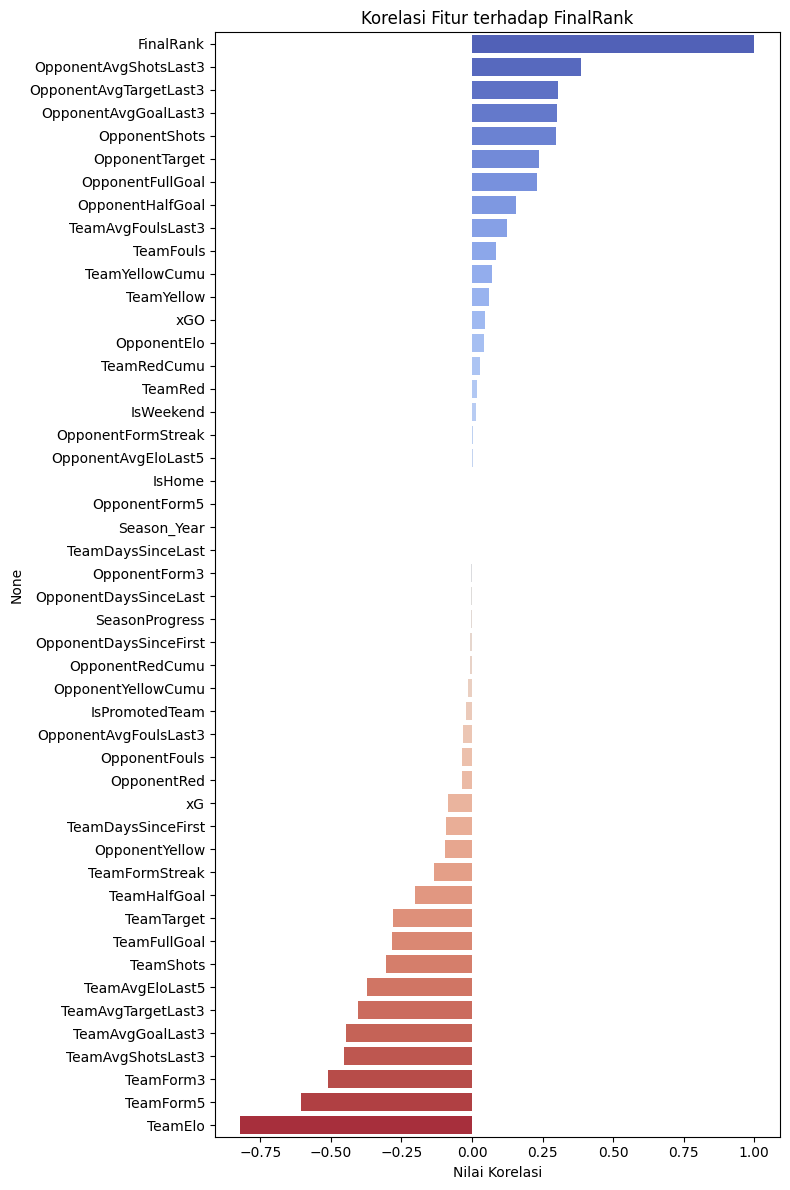

In [4]:
plt.figure(figsize=(8, 12))
sns.barplot(
    y=correlation_to_finalrank.index,
    x=correlation_to_finalrank.values,
    palette='coolwarm'
)
plt.title('Korelasi Fitur terhadap FinalRank')
plt.xlabel('Nilai Korelasi')
plt.tight_layout()
plt.show()

In [5]:
# Pilih fitur kategorik
categorical_cols = df.select_dtypes(include='object').columns

# Encode kategori (agar bisa diproses)
encoded_df = df[categorical_cols].apply(LabelEncoder().fit_transform)

# FinalRank harus berupa kelas, misalnya bulatkan ke int jika ingin treat sebagai kelas
# Tapi karena FinalRank itu numerik terus menerus, kita pakai f_regression
from sklearn.feature_selection import f_regression

# Hitung F-value dan p-value
f_values, p_values = f_regression(encoded_df, team_df['FinalRank'])

# Gabungkan hasil ke dataframe
anova_result = pd.DataFrame({
    'Feature': categorical_cols,
    'F_value': f_values,
    'p_value': p_values
}).sort_values(by='F_value', ascending=False)

print(anova_result)


NameError: name 'team_df' is not defined

In [ ]:
for col in categorical_cols:
    print(f"\nMean FinalRank per category for '{col}':")
    print(team_df.groupby(col)['FinalRank'].mean().sort_values())


C:\Users\ragil\AppData\Local\Temp\ipykernel_4872\1824154077.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


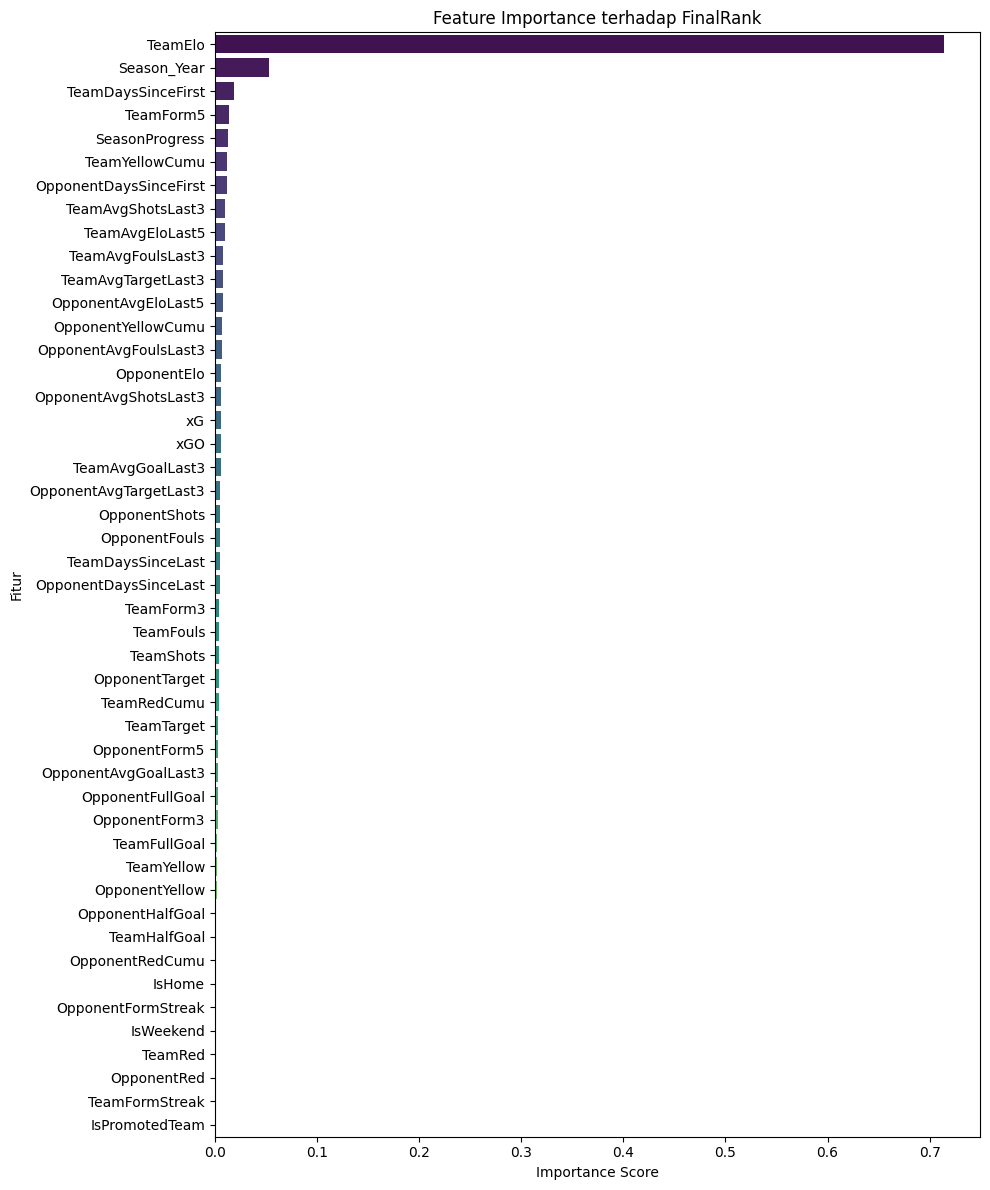

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Salin data
data = numerical_cols

# Drop kolom datetime (MatchDate) karena tidak bisa langsung dipakai model
# data['MatchYear'] = data['MatchDate'].dt.year
# data['MatchMonth'] = data['MatchDate'].dt.month
# data['MatchDay'] = data['MatchDate'].dt.day
# data = data.drop(columns=['MatchDate'])  # drop as original

# Encode fitur kategorik
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Pisahkan X dan y
X = data.drop(columns='FinalRank')
y = data['FinalRank']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Latih model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Ambil feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Tampilkan
plt.figure(figsize=(10, 12))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importance terhadap FinalRank')
plt.xlabel('Importance Score')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()


## Load Data

In [224]:
#df.to_csv(r"C:\Users\ragil\OneDrive\Documents\Skripsi\bola\dataset\core\0906-06-05-2025_last_2000_2024_team_format.csv", index = False)